In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

<!-- 1 Data cleaning
2 EDA analysis
3 Text preprocessing
4.model building
5 Evaluation
6 Improvement
7 website and deploy -->

# 1. Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,v1,v2
747,spam,U are subscribed to the best Mobile Content Se...
3477,ham,I can ask around but there's not a lot in term...
3825,ham,"Goodmorning,my grandfather expired..so am on l..."
5164,spam,Congrats 2 mobile 3G Videophones R yours. call...
1112,ham,So that means you still think of teju


In [11]:
#renaming columns
df.rename(columns={'v1': 'target', 'v2':'text'}, inplace=True)

In [12]:
df.sample(5)

,target,text
1996,ham,Lol boo I was hoping for a laugh
4776,ham,Sorry completely forgot * will pop em round th...
3767,ham,Where are you call me.
141,ham,"Sir, Waiting for your mail."
3622,ham,"Damn, poor zac doesn't stand a chance"


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.target = encoder.fit_transform(df['target'])

In [18]:
df.isnull().sum()  #check null values

target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [23]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5169, 2)

# EDA VISUALIZATION

In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

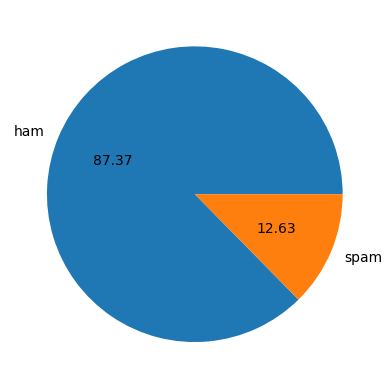

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%.2f')
plt.show()

In [38]:
#data is imbalanced
# we have to fine no. of words, scentences, charcter

In [39]:
import nltk


In [40]:
#no fo charcters length
df['num_characters'] = df['text'].apply(len)

In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
#no of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [43]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
#scentences
df['num_scentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words,num_scentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[['num_characters', 'num_words', 'num_scentences']].describe()

,num_characters,num_words,num_scentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
#describe ham
df[df['target'] ==0 ][['num_characters', 'num_words', 'num_scentences']].describe()

,num_characters,num_words,num_scentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
df[df['target'] ==1 ][['num_characters', 'num_words', 'num_scentences']].describe()

,num_characters,num_words,num_scentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

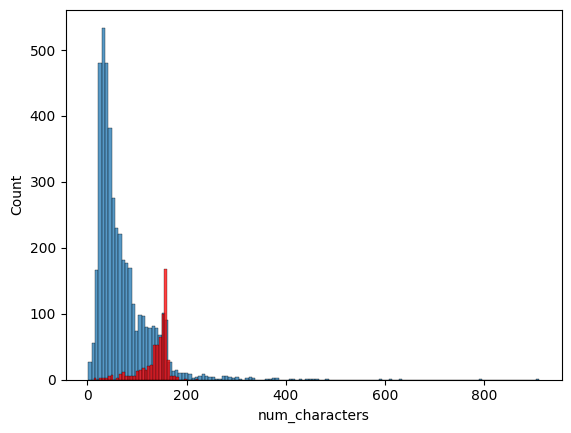

In [51]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='r')

<Axes: xlabel='num_words', ylabel='Count'>

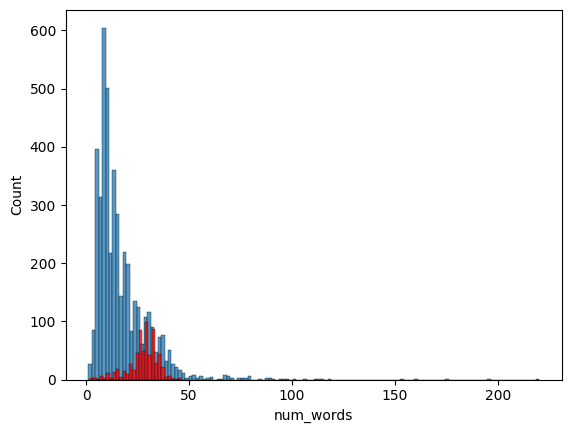

In [53]:

sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='r')

<Axes: xlabel='num_scentences', ylabel='Count'>

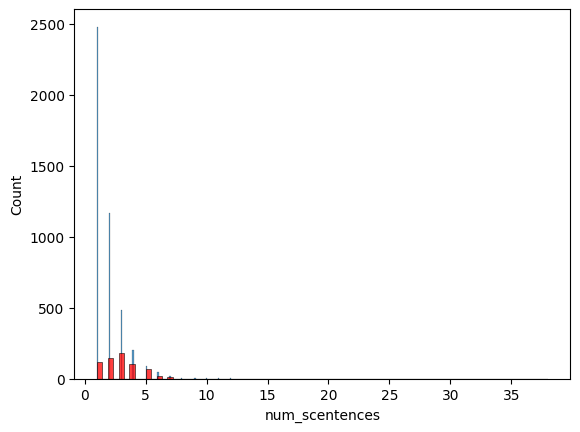

In [54]:

sns.histplot(df[df['target']==0]['num_scentences'])
sns.histplot(df[df['target']==1]['num_scentences'], color='r')

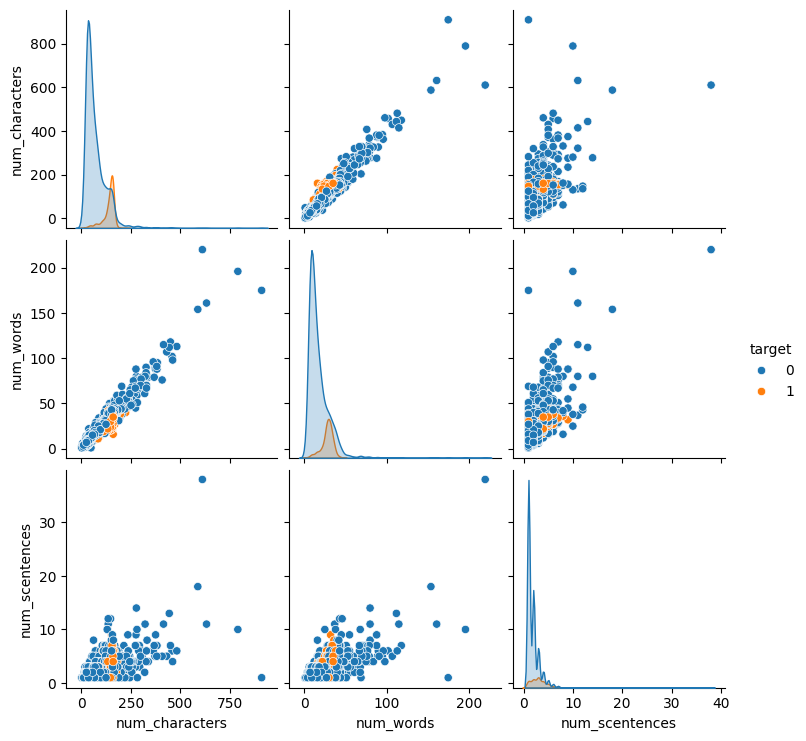

In [55]:
#relattions
sns.pairplot(df, hue='target')

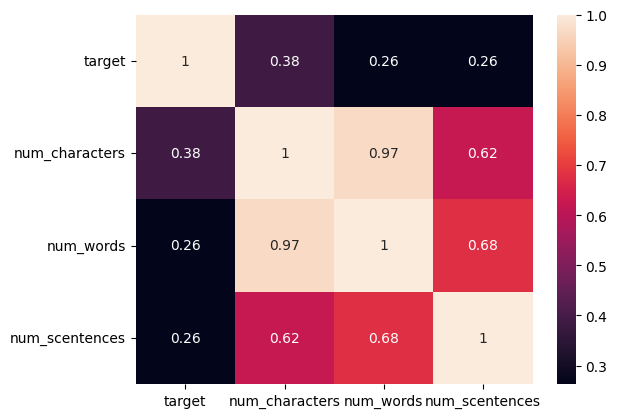

In [79]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# DATA PREPROCESSING
## Lower case, tokenization, remove special char, remove stop words and punctuation, stemming

In [81]:
import string
def transform_text(text):
    ps = PorterStemmer()
    #1 Lower text
    text = text.lower()
    
    #2 tokenization  , break in words
    text = nltk.word_tokenize(text)
    
    #3 remove special char
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #4 remove stopwords
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    #5 stemming
    for i in text:
        y.append(ps.stem(i))
        
    
    return y
    

In [87]:
df['transformed_text'] = df['text'].apply(transform_text)

In [88]:
df.head()

,target,text,num_characters,num_words,num_scentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [104]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')
df.transformed_text = df.transformed_text.apply(str)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

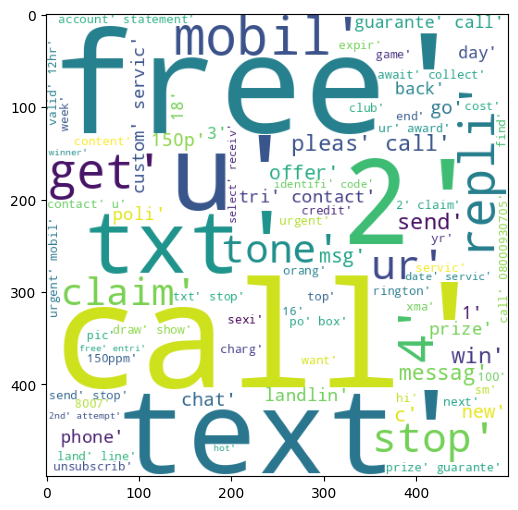

In [105]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

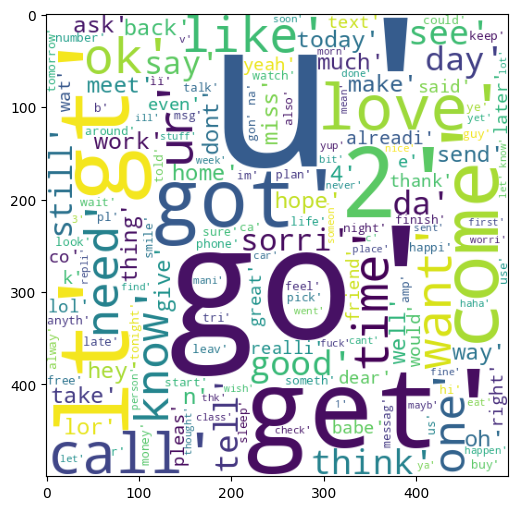

In [107]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [110]:
spam_corpus = []
for msg in df[df['target'] ==1 ]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [112]:
len(spam_corpus)

9939

<Axes: xlabel='0', ylabel='1'>

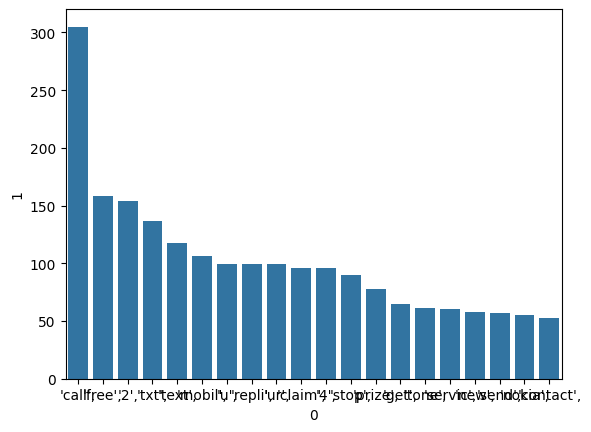

In [129]:
from collections import Counter
new_ds = pd.DataFrame(Counter(spam_corpus).most_common(20))
sns.barplot(new_ds, x=new_ds[0], y=new_ds[1])


In [132]:
ham_corpus = []
for msg in df[df['target'] ==0 ]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [133]:
len(ham_corpus)

35413

<Axes: xlabel='0', ylabel='1'>

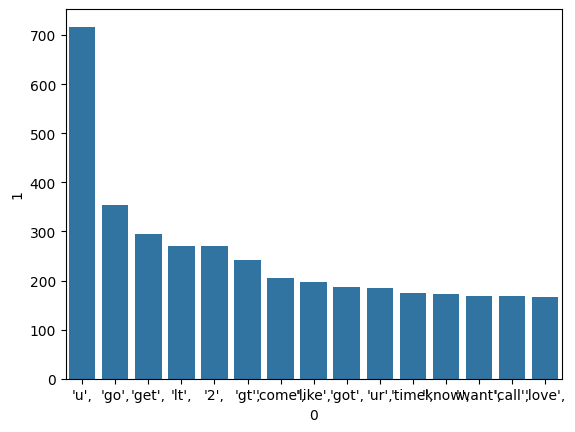

In [135]:
from collections import Counter
new_ds = pd.DataFrame(Counter(ham_corpus).most_common(15))
sns.barplot(new_ds, x=new_ds[0], y=new_ds[1])


# Model building

In [164]:
#bag of words, tfitf, word to bag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [165]:
X.shape

(5169, 3000)

In [166]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [168]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [169]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [170]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [171]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [172]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [163]:
#tfitd -----> mnb chooses

In [173]:
import pickle
pickle.dump(tfidf, open('vect.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))
